# Generating and Visualizing Counterfactual Explanations for Tree-Cycles Dataset

In [50]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
module_path

'/home/coder/gretel'

In [51]:
from src.evaluation.evaluator_manager import EvaluatorManager

config_file_path = module_path + '/examples/config/config_tree-cycles_tree-cycles_custom_oracle_obs.json'
output_file_path = module_path + '/examples/output/tree_cycles_custom_oracle/Oblivious_Bidirectional_Search/results_run-0.json'
output_folder = module_path + '/examples/output/'
stats_folder = module_path + '/examples/stats/'

# Verifying that the paths are valid
(os.path.isfile(config_file_path), os.path.isfile(output_file_path), os.path.isdir(output_folder), os.path.isdir(stats_folder))

(True, True, True, True)

### Executing the pipeline

In [52]:
# The run number is a way to differentiate many runs of the same configurations
eval_manager = EvaluatorManager(config_file_path, run_number=0)
# Creating the evaluation pipelines
eval_manager.create_evaluators()
# Evaluating the explainers
eval_manager.evaluate()

### Reading the json with the results

In [53]:
with open(output_file_path, 'r') as rs_json_reader:
                results = rs_json_reader.read()

results

'{"config": {"dataset": {"name": "tree-cycles", "parameters": {"n_inst": 100, "n_per_inst": 60, "n_in_cycles": 20}}, "oracle": {"name": "tree_cycles_custom_oracle", "parameters": {}}, "explainer": {"name": "bidirectional_oblivious_search", "parameters": {"graph_distance": {"name": "graph_edit_distance", "parameters": {}}}}, "metrics": [{"name": "graph_edit_distance", "parameters": {}}, {"name": "oracle_calls", "parameters": {}}, {"name": "correctness", "parameters": {}}, {"name": "sparsity", "parameters": {}}, {"name": "fidelity", "parameters": {}}, {"name": "oracle_accuracy", "parameters": {}}]}, "runtime": [0.01742863655090332, 0.07516336441040039, 0.012549400329589844, 0.15450310707092285, 0.11389040946960449, 0.015827178955078125, 0.4920036792755127, 0.02125859260559082, 0.021692276000976562, 0.13596820831298828, 0.04859590530395508, 0.03855395317077637, 0.01693582534790039, 0.010893583297729492, 0.016824722290039062, 0.023937225341796875, 0.1548001766204834, 0.9943907260894775, 0.

In [54]:
from src.data_analysis.data_analyzer import DataAnalyzer
import pandas as pd

dtan = DataAnalyzer(output_folder, stats_folder)
dtan.aggregate_data()
dtan.aggregate_runs()
dtan.create_tables_by_oracle_dataset()

results_table = pd.read_csv(stats_folder + 'tree-cycles-tree_cycles_custom_oracle.csv')
results_table

,Unnamed: 0,explainer,runtime,runtime-std,Graph_Edit_Distance,Graph_Edit_Distance-std,Oracle_Calls,Oracle_Calls-std,Correctness,Correctness-std,Sparsity,Sparsity-std,Fidelity,Fidelity-std,Oracle_Accuracy,Oracle_Accuracy-std
0,0,bidirectional_oblivious_search,0.197314,0.0,111.06,0.0,237.66,0.0,0.96,0.0,0.924152,0.0,0.96,0.0,1.0,0.0


In [55]:
# Getting one of the evaluators (evaluation pipelines)
ev = eval_manager.evaluators[0]
# Obtain the for each data instance its counterfactual explanation
inst_exp_list = ev.get_instance_explanation_pairs()
# Take the first pair instance-explanation as an example
inst, exp = inst_exp_list[2]

In [56]:
# Printing the steps needed to obtain the counterfactual
cf_actions = dtan.get_counterfactual_actions(inst, exp)
for act, el in cf_actions.items():
    print(act, el)

Remove Nodes []
Remove Edges [(32, 31), (17, 46), (50, 52), (29, 23), (7, 20), (4, 9), (6, 24), (12, 16), (16, 29), (42, 51), (19, 55), (15, 42), (32, 58), (25, 38), (18, 44), (57, 54), (22, 32), (0, 5), (43, 9), (15, 57), (55, 38), (2, 8), (42, 26), (19, 33), (40, 13), (14, 46), (27, 58), (43, 48), (29, 37), (3, 21), (11, 56), (23, 30), (9, 10), (6, 41), (34, 27), (56, 39), (55, 37), (23, 45), (41, 26), (39, 59), (45, 48), (1, 17), (24, 28), (50, 47), (16, 18), (11, 40), (1, 35), (0, 43), (8, 50), (42, 52), (25, 36), (43, 53), (35, 49), (6, 34), (29, 39), (20, 42), (36, 26), (21, 41), (5, 35)]
Add Nodes []
Add Edges [(3, 4), (30, 46), (26, 27), (13, 42), (32, 49), (12, 13), (30, 55), (21, 25), (0, 2), (8, 9), (2, 57), (4, 27), (18, 56), (2, 11), (17, 30), (28, 30), (29, 59), (22, 50), (36, 49), (32, 39), (5, 52), (24, 32), (30, 54), (43, 45), (12, 15), (20, 22), (41, 57), (39, 41), (2, 56), (23, 24), (0, 1), (10, 11), (34, 36), (1, 5), (18, 55), (11, 19), (28, 29), (37, 38), (18, 58),

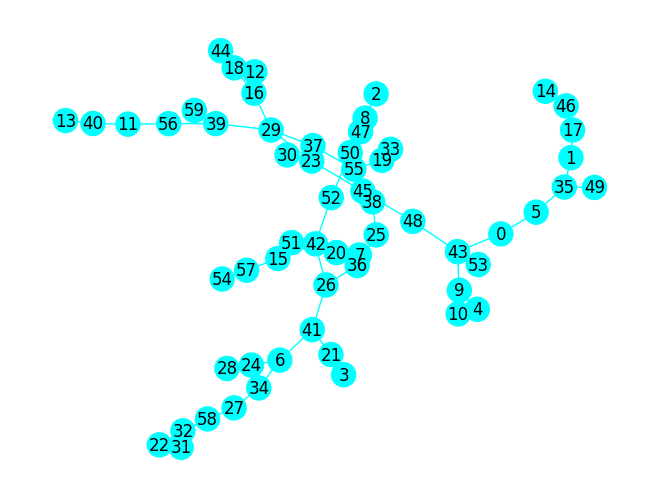

In [57]:
dtan.draw_graph(inst, layout='spring')

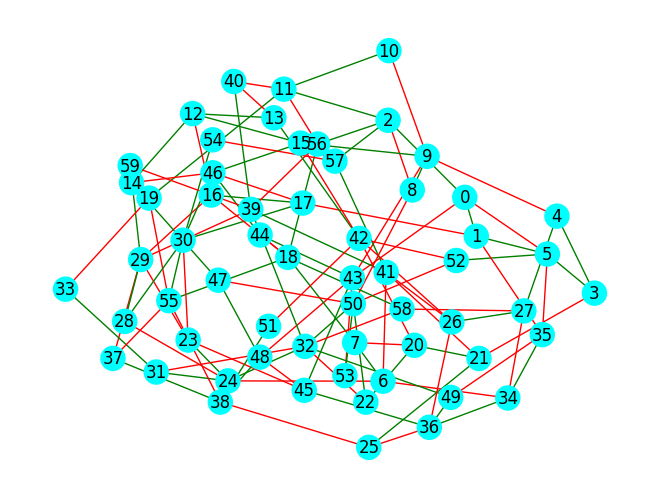

In [58]:
dtan.draw_counterfactual_actions(inst, exp, layout='spring')